<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/SA6_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [2]:
# For the current version: 
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 50kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
!wget https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/raw/main/quickdraw10.npz

--2020-10-06 23:07:14--  https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/raw/main/quickdraw10.npz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/quickdraw10.npz [following]
--2020-10-06 23:07:14--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/quickdraw10.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25421363 (24M) [application/octet-stream]
Saving to: ‘quickdraw10.npz’

quickdraw10.npz     100%[===================>]  24.24M  49.9MB/s    in 0.5s    

2020-10-06 23:07:15 (49.9 MB

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [5]:
def load_quickdraw10(path):

  return X_train, y_train, X_test, y_test

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=0.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [42]:
model = create_model()

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## Experiment with Batch Size
  Run 5 experiments with various batch sizes of your choice.

  Visualize the results

  Write up an analysis of the experiments and select the "best" 
  
  performing model among your experiments. 

  Make sure to compare against your model's performance yesterday.

In [44]:
# fit the model 
# batch size 35
model = create_model()
bt_default = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=35,
                       validation_data=(X_test, y_test))

Epoch 1/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.7614 - accuracy: 0.7913 - val_loss: 0.3617 - val_accuracy: 0.8977
Epoch 2/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.9021 - val_loss: 0.3011 - val_accuracy: 0.9128
Epoch 3/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.9147 - val_loss: 0.2722 - val_accuracy: 0.9216
Epoch 4/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.9241 - val_loss: 0.2517 - val_accuracy: 0.9267
Epoch 5/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.2432 - accuracy: 0.9307 - val_loss: 0.2284 - val_accuracy: 0.9365
Epoch 6/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9358 - val_loss: 0.2150 - val_accuracy: 0.9368
Epoch 7/15
1715/1715 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9405 - val_loss: 0.1991 - val_accuracy:

In [45]:
# fit the model 
# batch size 30
model = create_model()
bt_default = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=30,
                       validation_data=(X_test, y_test))

Epoch 1/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7179 - accuracy: 0.7994 - val_loss: 0.3466 - val_accuracy: 0.8991
Epoch 2/10
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3222 - accuracy: 0.9071 - val_loss: 0.2807 - val_accuracy: 0.9175
Epoch 3/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.9219 - val_loss: 0.2500 - val_accuracy: 0.9280
Epoch 4/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9303 - val_loss: 0.2256 - val_accuracy: 0.9341
Epoch 5/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2179 - accuracy: 0.9371 - val_loss: 0.2139 - val_accuracy: 0.9391
Epoch 6/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1999 - accuracy: 0.9421 - val_loss: 0.1895 - val_accuracy: 0.9449
Epoch 7/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1845 - accuracy: 0.9463 - val_loss: 0.1803 - val_accuracy:

In [50]:
# fit the model 
# batch size 10
model = create_model()
bt_small = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=10,
                       validation_data=(X_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.4730 - accuracy: 0.8620 - val_loss: 0.2558 - val_accuracy: 0.9266
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.2309 - accuracy: 0.9327 - val_loss: 0.1899 - val_accuracy: 0.9434
Epoch 3/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.1830 - accuracy: 0.9465 - val_loss: 0.1606 - val_accuracy: 0.9499
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1542 - accuracy: 0.9550 - val_loss: 0.1450 - val_accuracy: 0.9560
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.1348 - accuracy: 0.9598 - val_loss: 0.1465 - val_accuracy: 0.9539
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.1199 - accuracy: 0.9645 - val_loss: 0.1320 - val_accuracy: 0.9580
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1087 - accuracy: 0.9671 - val_loss: 0.1165 - val_accura

In [51]:
# fit the model 
# batch size 40
model = create_model()
bt_default = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=20,
                       validation_data=(X_test, y_test))

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.6319 - accuracy: 0.8220 - val_loss: 0.3046 - val_accuracy: 0.9111
Epoch 2/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2909 - accuracy: 0.9156 - val_loss: 0.2522 - val_accuracy: 0.9278
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2435 - accuracy: 0.9298 - val_loss: 0.2227 - val_accuracy: 0.9333
Epoch 4/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2128 - accuracy: 0.9393 - val_loss: 0.2027 - val_accuracy: 0.9406
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1912 - accuracy: 0.9447 - val_loss: 0.1901 - val_accuracy: 0.9443
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1739 - accuracy: 0.9496 - val_loss: 0.1705 - val_accuracy: 0.9508
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1595 - accuracy: 0.9540 - val_loss: 0.1583 - val_accuracy:

In [48]:
# fit the model 
# batch size 256
model = create_model()
bt_large = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=256,
                       validation_data=(X_test, y_test))

Epoch 1/15
235/235 [==============================] - 1s 4ms/step - loss: 1.9863 - accuracy: 0.3690 - val_loss: 1.5845 - val_accuracy: 0.5622
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 1.2104 - accuracy: 0.7048 - val_loss: 0.8788 - val_accuracy: 0.7964
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 0.7480 - accuracy: 0.8161 - val_loss: 0.6095 - val_accuracy: 0.8486
Epoch 4/15
235/235 [==============================] - 1s 4ms/step - loss: 0.5706 - accuracy: 0.8509 - val_loss: 0.4970 - val_accuracy: 0.8708
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.4854 - accuracy: 0.8695 - val_loss: 0.4367 - val_accuracy: 0.8824
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8805 - val_loss: 0.3989 - val_accuracy: 0.8907
Epoch 7/15
235/235 [==============================] - 1s 4ms/step - loss: 0.4015 - accuracy: 0.8881 - val_loss: 0.3712 - val_accuracy: 0.8959
Epoch 

In [52]:
# visualization of the results
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["35_", "10_", "256_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.631922,0.822000,0.304588,0.9111,0,35_
1,0.290890,0.915600,0.252202,0.9278,1,35_
2,0.243457,0.929817,0.222747,0.9333,2,35_
3,0.212776,0.939267,0.202662,0.9406,3,35_
4,0.191210,0.944717,0.190073,0.9443,4,35_


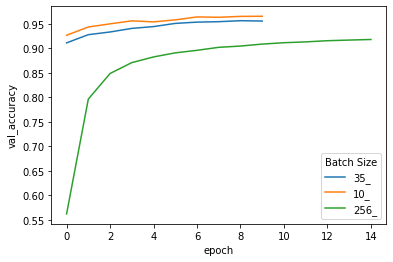

In [53]:
# make a visualization
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [57]:
model = create_model()
# Default is 1
lr_default = model.fit(X_train, y_train,
                       epochs=35,
                       validation_data=(X_test, y_test))

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7168 - accuracy: 0.8017 - val_loss: 0.3410 - val_accuracy: 0.9048
Epoch 2/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3142 - accuracy: 0.9098 - val_loss: 0.2690 - val_accuracy: 0.9225
Epoch 3/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accuracy: 0.9242 - val_loss: 0.2338 - val_accuracy: 0.9330
Epoch 4/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2326 - accuracy: 0.9339 - val_loss: 0.2078 - val_accuracy: 0.9397
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2099 - accuracy: 0.9408 - val_loss: 0.1968 - val_accuracy: 0.9426
Epoch 6/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1927 - accuracy: 0.9446 - val_loss: 0.1794 - val_accuracy: 0.9478
Epoch 7/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1790 - accuracy: 0.9486 - val_loss: 0.1670 - val_accuracy:

In [ ]:
model = create_model()
# Default is 0.1
lr_default = model.fit(X_train, y_train,
                       epochs=35,
                       validation_data=(X_test, y_test))

In [54]:
model = create_model()
# Default is 0.01
lr_default = model.fit(X_train, y_train,
                       epochs=35,
                       validation_data=(X_test, y_test))

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7475 - accuracy: 0.7898 - val_loss: 0.3529 - val_accuracy: 0.8949
Epoch 2/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3288 - accuracy: 0.9064 - val_loss: 0.2811 - val_accuracy: 0.9181
Epoch 3/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2787 - accuracy: 0.9195 - val_loss: 0.2544 - val_accuracy: 0.9249
Epoch 4/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9289 - val_loss: 0.2337 - val_accuracy: 0.9293
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2251 - accuracy: 0.9348 - val_loss: 0.2088 - val_accuracy: 0.9370
Epoch 6/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2072 - accuracy: 0.9409 - val_loss: 0.1934 - val_accuracy: 0.9409
Epoch 7/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1933 - accuracy: 0.9444 - val_loss: 0.1827 - val_accuracy:

In [61]:
model = create_model(lr=0.001)
lr_low = model.fit(X_train, y_train,
                    epochs=35,
                    validation_data=(X_test, y_test))

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0642 - accuracy: 0.3035 - val_loss: 1.7523 - val_accuracy: 0.4859
Epoch 2/35
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4163 - accuracy: 0.6047 - val_loss: 1.0881 - val_accuracy: 0.7370
Epoch 3/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8996 - accuracy: 0.7856 - val_loss: 0.7267 - val_accuracy: 0.8280
Epoch 4/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6595 - accuracy: 0.8331 - val_loss: 0.5716 - val_accuracy: 0.8525
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5472 - accuracy: 0.8548 - val_loss: 0.4930 - val_accuracy: 0.8690
Epoch 6/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4841 - accuracy: 0.8689 - val_loss: 0.4454 - val_accuracy: 0.8793
Epoch 7/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4433 - accuracy: 0.8785 - val_loss: 0.4120 - val_accuracy:

In [62]:
model = create_model(lr=0.0001)
lr_high = model.fit(X_train, y_train,
                    epochs=35,
                    validation_data=(X_test, y_test))

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2679 - accuracy: 0.1791 - val_loss: 2.2275 - val_accuracy: 0.2132
Epoch 2/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2010 - accuracy: 0.2535 - val_loss: 2.1640 - val_accuracy: 0.2919
Epoch 3/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1418 - accuracy: 0.3160 - val_loss: 2.1027 - val_accuracy: 0.3532
Epoch 4/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0822 - accuracy: 0.3663 - val_loss: 2.0394 - val_accuracy: 0.4005
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0196 - accuracy: 0.4111 - val_loss: 1.9725 - val_accuracy: 0.4434
Epoch 6/35
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9529 - accuracy: 0.4551 - val_loss: 1.9015 - val_accuracy: 0.4878
Epoch 7/35
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8816 - accuracy: 0.4965 - val_loss: 1.8260 - val_accuracy:

In [63]:
# visualization the results
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high],
                       [".01_", ".001_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.716795,0.801700,0.341018,0.9048,0,.01_
1,0.314221,0.909783,0.268962,0.9225,1,.01_
2,0.262822,0.924217,0.233764,0.9330,2,.01_
3,0.232624,0.933933,0.207849,0.9397,3,.01_
4,0.209899,0.940750,0.196828,0.9426,4,.01_


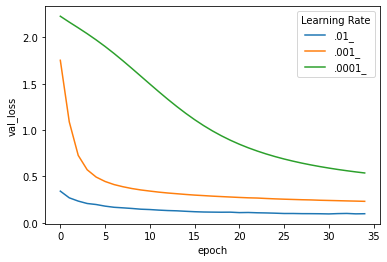

In [64]:
# make the visualization
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

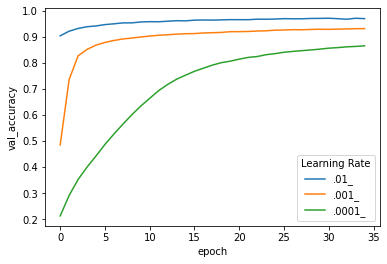

In [65]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [66]:
model = create_model()
# default 1
lr_default = model.fit(X_train, y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7740 - accuracy: 0.7866 - val_loss: 0.3583 - val_accuracy: 0.8985
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3375 - accuracy: 0.9042 - val_loss: 0.2948 - val_accuracy: 0.9143
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2884 - accuracy: 0.9166 - val_loss: 0.2592 - val_accuracy: 0.9253
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2569 - accuracy: 0.9264 - val_loss: 0.2385 - val_accuracy: 0.9304
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2321 - accuracy: 0.9330 - val_loss: 0.2148 - val_accuracy: 0.9367
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2119 - accuracy: 0.9387 - val_loss: 0.1949 - val_accuracy: 0.9412
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1943 - accuracy: 0.9440 - val_loss: 0.1904 - val_accuracy:

In [68]:
model = create_model(lr=0.1)
lr_default = model.fit(X_train, y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.9032 - val_loss: 0.1758 - val_accuracy: 0.9464
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1624 - accuracy: 0.9507 - val_loss: 0.1355 - val_accuracy: 0.9580
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9620 - val_loss: 0.1307 - val_accuracy: 0.9582
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1067 - accuracy: 0.9671 - val_loss: 0.1256 - val_accuracy: 0.9624
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0941 - accuracy: 0.9709 - val_loss: 0.1119 - val_accuracy: 0.9662
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0834 - accuracy: 0.9744 - val_loss: 0.1235 - val_accuracy: 0.9626
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9760 - val_loss: 0.1127 - val_accuracy:

In [69]:
model = create_model(lr=0.01)
lr_low = model.fit(X_train, y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7519 - accuracy: 0.7821 - val_loss: 0.3524 - val_accuracy: 0.8976
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3244 - accuracy: 0.9071 - val_loss: 0.2831 - val_accuracy: 0.9177
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2712 - accuracy: 0.9212 - val_loss: 0.2424 - val_accuracy: 0.9293
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9314 - val_loss: 0.2175 - val_accuracy: 0.9344
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2158 - accuracy: 0.9387 - val_loss: 0.2012 - val_accuracy: 0.9412
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1966 - accuracy: 0.9436 - val_loss: 0.1890 - val_accuracy: 0.9444
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1818 - accuracy: 0.9477 - val_loss: 0.1770 - val_accuracy:

In [70]:
model = create_model(lr=0.001)
lr_meduim = model.fit(X_train, y_train,
                    epochs=35,
                    validation_data=(X_test, y_test))

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0785 - accuracy: 0.3781 - val_loss: 1.7965 - val_accuracy: 0.5355
Epoch 2/35
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4689 - accuracy: 0.6109 - val_loss: 1.1396 - val_accuracy: 0.6939
Epoch 3/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9579 - accuracy: 0.7569 - val_loss: 0.7716 - val_accuracy: 0.8136
Epoch 4/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7027 - accuracy: 0.8244 - val_loss: 0.6018 - val_accuracy: 0.8483
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5770 - accuracy: 0.8510 - val_loss: 0.5132 - val_accuracy: 0.8655
Epoch 6/35
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5054 - accuracy: 0.8656 - val_loss: 0.4585 - val_accuracy: 0.8769
Epoch 7/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4595 - accuracy: 0.8751 - val_loss: 0.4229 - val_accuracy:

In [71]:
model = create_model(lr=0.0001)
lr_high = model.fit(X_train, y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2715 - accuracy: 0.1510 - val_loss: 2.2327 - val_accuracy: 0.1777
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2108 - accuracy: 0.2098 - val_loss: 2.1735 - val_accuracy: 0.2466
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1550 - accuracy: 0.2778 - val_loss: 2.1147 - val_accuracy: 0.3177
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0971 - accuracy: 0.3437 - val_loss: 2.0532 - val_accuracy: 0.3776
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0355 - accuracy: 0.3959 - val_loss: 1.9876 - val_accuracy: 0.4246
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9693 - accuracy: 0.4404 - val_loss: 1.9171 - val_accuracy: 0.4690
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8978 - accuracy: 0.4846 - val_loss: 1.8410 - val_accuracy:

In [72]:
# visualization the results
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low,lr_medium, lr_high],
                       ["0.1_",".01_", ".001_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.322617,0.903200,0.175830,0.9464,0,0.1_
1,0.162380,0.950667,0.135511,0.9580,1,0.1_
2,0.126138,0.962000,0.130726,0.9582,2,0.1_
3,0.106747,0.967117,0.125638,0.9624,3,0.1_
4,0.094107,0.970883,0.111873,0.9662,4,0.1_


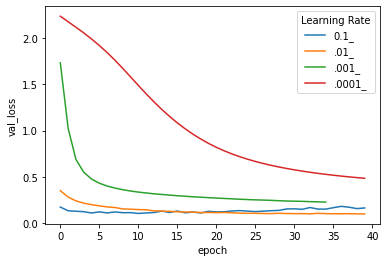

In [73]:
# make the visualization
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 

It is an algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch.In addition to that, it is worked by computing the gradient of the loss function with respect to each weight by the chain rule.


## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


